The aim of this project is to clean in analyze 50,000 data points that have been scraped from EBay’s used car listings. Working as a data analyst for large online used car dealership the goal is to enable buyers to make informed decisions while purchasing sales merchandise. As well as assist sales and development teams through the process of curating the website layout and sales prices. 

# Opening and Exploring the Data

In November of 2016, data was scraped on over 370000 cars with Scrapy from the Ebay-Kleinanzeigan website. For our purposes analysis will be done on a subset of 50,000 data points. 

* [Ebay-Keinaseigan Data Set](https://www.kaggle.com/orgesleka/used-cars-database/data)

A data dictionary provided with the dataset provides the following information:

* **dateCrawled** - When this ad was first crawled. All field-values are taken from this date.
* **name** - Name of the Car.
* **seller** - Whether the seller is private or a dealer.
* **offerType** - The type of listing.
* **price** - The price on the ad to sell the car.
* **abtest** - Whether the listing is included in an A/B test.
* **vehicleType** - The vehicle Type.
* **yearOfRegistration** - The year in which the car was first registered.
* **gearbox** - The transmissoin type.
* **powerPS** - The poser of the car in PS.
* **model** - The car model name.
* **kilometer** - How many kilometers the car has driven.
* **monthOfRegistration** - The month in which the car was first registered.
* **fuelType** - What type of fuel the car uses.
* **brand** - The brand of the car.
* **notRepairedDamage** - If the car has a damage which is not yet repaired.
* **dateCreated** - The date on which the eBay listing was created.
* **nrOfPictures** - The postal code for the location of the vehicle.
* **lastSeenOnline** - When the crawler saw this ad last online. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

We can see that the dataset contains 20 columns, most of which are strings. Some columns have null values, but none have more that ~20% null values. 

# Cleaning Wrong Data

### Cleaning Column Names

The column names use camelcase instead of Python's preferred snakecase. We will convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive.

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model', 'odometer', 'registration_month', 'fuel_type', 'brand', 'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code', 'last_seen'] 

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Changes made include:

* yearOfRegistration to registration_year
* monthOfRegistration to registration_month
* notRepairedDamage to unrepaired_damage
* dateCreated to ad_created

### Intial Exploration

An initial data exploration to determine what other cleaning tasks need to be done. 

In [8]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-23 19:38:20,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


The `abtest` column provides information related to an A/B test done by EBay. We do not have the result data for this test. The column will be removed because it doesn't have any useful information for our purposes.

Also the `seller` and `offer_type` columns only have two unique values. These columns can be removed given they will not provide usefull infromation. 

In [9]:
autos.drop(columns=['abtest'], inplace = True)

In [10]:
autos.drop(columns=['seller', 'offer_type'], inplace= True)

In [11]:
autos.head()

,date_crawled,name,price,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [12]:
autos['fuel_type'].value_counts()

benzin     30107
diesel     14567
lpg          691
cng           75
hybrid        37
andere        22
elektro       19
Name: fuel_type, dtype: int64

In [13]:
autos['vehicle_type'].value_counts()

limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64

Some text columns contain data that is in German and may need to be translated to english to fully analyze the dataset. 

The `price` and `odometer` columns are numeric values stored as text. For each column we will:

* Remove any non_numeric characters.
* Convert the column to a numeric datatype.
* Use `Dataframe.rename()` the `odometer` column to `odometer_km`


In [14]:
autos['price'].head()

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object

In [15]:
autos['price'] = autos['price'].str.replace('$', '')

In [16]:
autos['price'].head()

0    5,000
1    8,500
2    8,990
3    4,350
4    1,350
Name: price, dtype: object

In [17]:
autos['price'] = autos['price'].str.replace(',', '').astype(float)

In [18]:
autos['price'].head()

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

In [19]:
autos.rename(columns={'odometer' : 'odometer_km'}, inplace = True)

In [20]:
autos['odometer_km'].head()

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer_km, dtype: object

In [21]:
autos['odometer_km'] = autos['odometer_km'].str.replace(',' , '')

In [22]:
autos['odometer_km'].head()

0    150000km
1    150000km
2     70000km
3     70000km
4    150000km
Name: odometer_km, dtype: object

In [23]:
autos['odometer_km'] = autos['odometer_km'].str.replace('km', '').astype(float)

In [24]:
autos['odometer_km'].head()

0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer_km, dtype: float64

### Exploring the Odometer and Price Columns

We'll continue exploring the the data, specifically looking for data that doesn't look right. We'll start by analyzing the `odometer_km` and `price` colums by:

* Analyzing the columns using minimum and maximum values and look for any values that look unrealistically high or low (outliers) that we might want to remove.

In [25]:
autos['odometer_km'].head()

0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer_km, dtype: float64

In [26]:
autos['odometer_km'].value_counts()

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
5000.0        967
40000.0       819
30000.0       789
20000.0       784
10000.0       264
Name: odometer_km, dtype: int64

In [27]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

There doesn't seem to be any obvious outliers of data in the odometer column. However the kilometers seem to be recored as averages or classes. 32 thousand vehicles are recorded as having 150,000. This could mean they all had close to or more than 150,000 kilometers. 


In [28]:
autos['price'].head()

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

In [29]:
autos['price'].value_counts()

0.0           1421
500.0          781
1500.0         734
2500.0         643
1200.0         639
1000.0         639
600.0          531
800.0          498
3500.0         498
2000.0         460
999.0          434
750.0          433
900.0          420
650.0          419
850.0          410
700.0          395
4500.0         394
300.0          384
2200.0         382
950.0          379
1100.0         376
1300.0         371
3000.0         365
550.0          356
1800.0         355
5500.0         340
1250.0         335
350.0          335
1600.0         327
1999.0         322
              ... 
2225.0           1
69997.0          1
139997.0         1
69999.0          1
4780.0           1
8930.0           1
21599.0          1
15911.0          1
10000000.0       1
5180.0           1
919.0            1
1247.0           1
5998.0           1
27020.0          1
21888.0          1
46500.0          1
2001.0           1
2459.0           1
345000.0         1
34940.0          1
2785.0           1
5248.0      

In [30]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [31]:
autos['price'].value_counts().sort_index(ascending = False)

99999999.0       1
27322222.0       1
12345678.0       3
11111111.0       2
10000000.0       1
3890000.0        1
1300000.0        1
1234566.0        1
999999.0         2
999990.0         1
350000.0         1
345000.0         1
299000.0         1
295000.0         1
265000.0         1
259000.0         1
250000.0         1
220000.0         1
198000.0         1
197000.0         1
194000.0         1
190000.0         1
180000.0         1
175000.0         1
169999.0         1
169000.0         1
163991.0         1
163500.0         1
155000.0         1
151990.0         1
              ... 
66.0             1
65.0             5
60.0             9
59.0             1
55.0             2
50.0            49
49.0             4
47.0             1
45.0             4
40.0             6
35.0             1
30.0             7
29.0             1
25.0             5
20.0             4
18.0             1
17.0             3
15.0             2
14.0             1
13.0             2
12.0             3
11.0        

After exploring the price column its clear some data points look to be outliers. There are several data points that are well over a million dollars. The company the we work for does not sell exotic vehicles any information on vehicles over the price of 90,000 will skew our data and should be removed. 

In [32]:
autos['price'].value_counts().sort_index(ascending = True)

0.0           1421
1.0            156
2.0              3
3.0              1
5.0              2
8.0              1
9.0              1
10.0             7
11.0             2
12.0             3
13.0             2
14.0             1
15.0             2
17.0             3
18.0             1
20.0             4
25.0             5
29.0             1
30.0             7
35.0             1
40.0             6
45.0             4
47.0             1
49.0             4
50.0            49
55.0             2
59.0             1
60.0             9
65.0             5
66.0             1
              ... 
151990.0         1
155000.0         1
163500.0         1
163991.0         1
169000.0         1
169999.0         1
175000.0         1
180000.0         1
190000.0         1
194000.0         1
197000.0         1
198000.0         1
220000.0         1
250000.0         1
259000.0         1
265000.0         1
295000.0         1
299000.0         1
345000.0         1
350000.0         1
999990.0         1
999999.0    

The price column also contains several data points for vehicles that are priced below 1,000, including 1,500 cars that are priced at 0.0. After consulting with the sales and development teams it has been decided that the cars that are of interest to the company fall between the 1,000 and 90,000 dollars. The data on all other vehicles will need to be removed.

To remove outlier data we will:

* Use pandas boolean indexing to filter the dataset

In [33]:
outlier_filter = (autos['price'] <= 90000.0) & (autos['price'] >= 1000.0)

In [34]:
autos = autos[outlier_filter]

In [35]:
autos['price'].value_counts().sort_index().head()

1000.0    639
1039.0      1
1040.0      1
1049.0      6
1050.0     95
Name: price, dtype: int64

In [36]:
autos['price'].value_counts().sort_index().tail()

85000.0    1
86500.0    1
88900.0    1
89000.0    1
89900.0    1
Name: price, dtype: int64

In [37]:
autos['price'].describe()

count    38578.000000
mean      7068.116232
std       7774.758925
min       1000.000000
25%       2200.000000
50%       4300.000000
75%       8940.500000
max      89900.000000
Name: price, dtype: float64

With outliers removed we now how a clear picture of the price data:

* Average price of cars sold: $7,159

* 75% of the cars sold for an average of: $9,000

* 50% of the cars sold for an average of $4,500

* 25% of the cars sold for an average of $2,500

The company can use this information to direct purchasing strategies. With possible target merchandise being in the in the range of 2,000 to 6,000 range and a sales price listing increase of $2,000.

# Exploring Date Information

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

* `date_crawled`: added by the crawler
* `last_seen`: added by the crawler
* `ad_created`: from the website
* `registration_month`: from the website
* `registration_year`: from the website

Right now, the `date_crawled`, `last_seen`, and `ad_created` columns are all identified as string values by pandas. Because the three columns are represented as strings, we will convert the data into numerical representation so we can understand it quantitatively.

In [38]:
autos[['date_crawled', 'ad_created', 'last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [39]:
autos['date_crawled'].str[:10].value_counts(normalize = True,dropna = False).sort_index()

2016-03-05    0.025533
2016-03-06    0.013868
2016-03-07    0.035175
2016-03-08    0.032609
2016-03-09    0.032480
2016-03-10    0.033361
2016-03-11    0.032843
2016-03-12    0.037405
2016-03-13    0.016019
2016-03-14    0.036653
2016-03-15    0.033594
2016-03-16    0.029084
2016-03-17    0.030484
2016-03-18    0.012779
2016-03-19    0.035175
2016-03-20    0.038182
2016-03-21    0.037249
2016-03-22    0.032428
2016-03-23    0.032220
2016-03-24    0.029032
2016-03-25    0.030510
2016-03-26    0.033102
2016-03-27    0.031365
2016-03-28    0.035357
2016-03-29    0.034009
2016-03-30    0.033024
2016-03-31    0.031417
2016-04-01    0.034553
2016-04-02    0.036342
2016-04-03    0.039141
2016-04-04    0.036886
2016-04-05    0.013350
2016-04-06    0.003266
2016-04-07    0.001503
Name: date_crawled, dtype: float64

Exploring the `date_crawled` column shows that the data collection was completed evenly over a month long interval from 03/05/16-04/07/16

In [40]:
autos['ad_created'].str[:10].value_counts(normalize = True,  dropna = False).sort_index()

2015-06-11    0.000026
2015-08-10    0.000026
2015-09-09    0.000026
2015-11-10    0.000026
2015-12-30    0.000026
2016-01-03    0.000026
2016-01-07    0.000026
2016-01-10    0.000052
2016-01-13    0.000026
2016-01-14    0.000026
2016-01-16    0.000026
2016-01-22    0.000026
2016-01-27    0.000078
2016-01-29    0.000026
2016-02-01    0.000026
2016-02-02    0.000052
2016-02-05    0.000052
2016-02-07    0.000026
2016-02-09    0.000026
2016-02-11    0.000026
2016-02-12    0.000052
2016-02-14    0.000052
2016-02-16    0.000026
2016-02-17    0.000026
2016-02-18    0.000052
2016-02-19    0.000078
2016-02-20    0.000026
2016-02-21    0.000052
2016-02-22    0.000026
2016-02-23    0.000104
                ...   
2016-03-09    0.032687
2016-03-10    0.033024
2016-03-11    0.033102
2016-03-12    0.037146
2016-03-13    0.017678
2016-03-14    0.034994
2016-03-15    0.033413
2016-03-16    0.029654
2016-03-17    0.030147
2016-03-18    0.013246
2016-03-19    0.034113
2016-03-20    0.038286
2016-03-21 

Analysis of the `ad_created` column shows that the majority of the advertisements were creating during the month of march with only a small percentage of the ads being more than a month old.

In [41]:
autos['last_seen'].str[:10].value_counts(normalize = True,  dropna = False).sort_index()

2016-03-05    0.001089
2016-03-06    0.003577
2016-03-07    0.004562
2016-03-08    0.006247
2016-03-09    0.008891
2016-03-10    0.009824
2016-03-11    0.011742
2016-03-12    0.022215
2016-03-13    0.008399
2016-03-14    0.012002
2016-03-15    0.015009
2016-03-16    0.015449
2016-03-17    0.026414
2016-03-18    0.007362
2016-03-19    0.014620
2016-03-20    0.019804
2016-03-21    0.019674
2016-03-22    0.020815
2016-03-23    0.017886
2016-03-24    0.018508
2016-03-25    0.017782
2016-03-26    0.016019
2016-03-27    0.014075
2016-03-28    0.019415
2016-03-29    0.020789
2016-03-30    0.023485
2016-03-31    0.022759
2016-04-01    0.023226
2016-04-02    0.024911
2016-04-03    0.024444
2016-04-04    0.023407
2016-04-05    0.130930
2016-04-06    0.234771
2016-04-07    0.139898
Name: last_seen, dtype: float64

In [42]:
autos['registration_year'].describe()

count    38578.000000
mean      2005.683602
std         86.737015
min       1000.000000
25%       2001.000000
50%       2005.000000
75%       2009.000000
max       9999.000000
Name: registration_year, dtype: float64

In [43]:
autos['registration_year'].value_counts().sort_index(ascending = False)

9999       2
9000       1
8888       1
6200       1
5911       1
5000       2
4500       1
4100       1
2800       1
2019       1
2018     398
2017    1008
2016     645
2015     357
2014     647
2013     790
2012    1303
2011    1615
2010    1580
2009    2075
2008    2202
2007    2258
2006    2651
2005    2785
2004    2607
2003    2477
2002    2135
2001    2064
2000    2000
1999    1724
        ... 
1967      25
1966      21
1965      17
1964       9
1963       7
1962       4
1961       6
1960      17
1959       6
1958       3
1957       2
1956       4
1955       1
1954       2
1953       1
1952       1
1951       1
1950       1
1948       1
1943       1
1941       2
1939       1
1938       1
1937       4
1934       2
1931       1
1929       1
1927       1
1001       1
1000       1
Name: registration_year, Length: 91, dtype: int64

The `registration_year` represents the year that the vehicle were first registered, given a good approximation of how old the vehicle is. We can see there are outliers with some vehicles having a registration year in the 1000's or above 2016( the year the dataset was created). We will remove these values with a boolean filter to unskew the data.  

In [44]:
registration_filter = (autos['registration_year'] > 1900) & (autos['registration_year'] <= 2016)

In [45]:
autos = autos[registration_filter]

In [46]:
autos['registration_year'].describe()

count    37158.000000
mean      2003.970747
std          6.998597
min       1927.000000
25%       2001.000000
50%       2005.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

With a clean dataset we have the following information for the `registration_year` column:

* Average age of the cars sold is 13 years.

* 75% of cars sold are 8 years old.

* 50% of cars sold are 11 years old.

# Exploring Price by Brand

When working with data on cars, its important to explore variations across different brans. We will use aggregation to understand the brand column.

### Top 20 Brands

In [47]:
autos['brand'].value_counts()[:20]

volkswagen        7843
bmw               4661
mercedes_benz     4148
audi              3630
opel              3314
ford              2183
renault           1386
peugeot           1038
fiat               784
skoda              709
seat               643
smart              618
toyota             544
mazda              530
citroen            517
nissan             507
mini               405
hyundai            400
sonstige_autos     384
volvo              334
Name: brand, dtype: int64

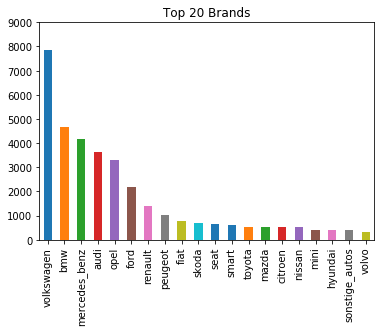

In [48]:
autos['brand'].value_counts()[:20].plot(kind = 'bar', title = 'Top 20 Brands', ylim = (0,9000))

The above chart shows the top 20 brands with the top 3 being Volkswagen, BMW, and Mercedes Benz. To further analyze the data we will aggregate across the top 20 brands to find the average price data and compare:

In [49]:
mean_price = {}
brands = autos['brand'].value_counts()[:20].index.values.tolist()

In [50]:
for brand in brands:
    brand_group = autos[autos['brand'] == brand]
    mean_price_brand = brand_group['price'].mean()
    mean_price[brand] = mean_price_brand

In [51]:
mean_price

{'volkswagen': 6645.13260232054,
 'bmw': 8975.103840377602,
 'mercedes_benz': 9174.193828351012,
 'audi': 10276.903581267217,
 'opel': 4219.954737477368,
 'ford': 5274.369216674301,
 'renault': 3526.433621933622,
 'peugeot': 3955.169556840077,
 'fiat': 4008.174744897959,
 'skoda': 6836.696755994359,
 'seat': 5638.640746500778,
 'smart': 3780.4692556634304,
 'toyota': 5573.57169117647,
 'mazda': 5309.526415094339,
 'citroen': 4614.970986460348,
 'nissan': 6428.428007889546,
 'mini': 10715.237037037037,
 'hyundai': 6181.8725,
 'sonstige_autos': 12381.307291666666,
 'volvo': 6151.583832335329}

In [52]:
mean_price_df = pd.DataFrame.from_dict(mean_price, orient = 'index')

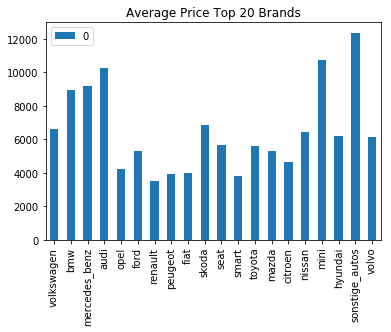

In [53]:
mean_price_df.plot(kind = 'bar', title = 'Average Price Top 20 Brands')

We can see that of the top 5 brands of cars sold Audi has the highest average sale price around 1,100 followed by Mercedes Benz with an average sale price of 9,000. This is important information when combined with the target purchase price we estimated earlier. We can use this data to place a higher priority on Audi, Mercedes Benz, and BMW vehicles with a price in the low target range estimated before. 

# Exploring Average Mileage by Brand

In [54]:
mean_odometer_km = {}

for brand in brands:
    brand_group = autos[autos['brand'] == brand]
    mean_odometer_brand = brand_group['odometer_km'].mean()
    mean_odometer_km[brand] = mean_odometer_brand
    

In [55]:
mean_odometer_km

{'volkswagen': 125765.65089889073,
 'bmw': 132068.2257026389,
 'mercedes_benz': 130139.82642237222,
 'audi': 127524.79338842975,
 'opel': 123952.92697646348,
 'ford': 119651.85524507558,
 'renault': 121489.898989899,
 'peugeot': 122341.04046242774,
 'fiat': 107901.78571428571,
 'skoda': 110063.46967559944,
 'seat': 116104.19906687403,
 'smart': 97775.08090614887,
 'toyota': 113740.80882352941,
 'mazda': 119981.1320754717,
 'citroen': 114245.64796905222,
 'nissan': 110335.3057199211,
 'mini': 88679.01234567902,
 'hyundai': 101862.5,
 'sonstige_autos': 90533.85416666667,
 'volvo': 137230.53892215568}

In [56]:
mean_odometer_df = pd.DataFrame.from_dict(mean_odometer_km, orient = 'index')

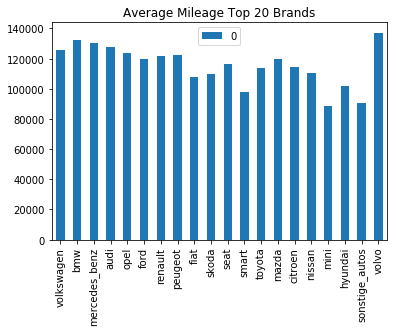

In [57]:
mean_odometer_df.plot(kind = 'bar', title = 'Average Mileage Top 20 Brands')

We can see that the top five brands sold all have a high average odometer reading with an average odometer reading over 120,000 kilometers or 75,000 miles. Odometer reading does not seem to have a large effect on the sales price of the vehicle with many of the top vehicle having similar average odometer readings but selling for different prices. 

# Conclusions

In this project, we analyzed data about used cars that were sold on the Ebay-Kleinanzeigan website with the goal of helping a team of buyers to make informed decisions while purchasing sales merchandise.

We concluded that the top five brands sold during the month of march 2016 were Volkswagen, BMW, Mercedes_Benz, Audi, and Opel. Of these five brands Audi, Mercedes_Benz and BMW sold for highest average sales price. We estimated target purchasing value of merchandise should be between 2,000 and 6,000 with a low estimated profit margin of about 2,000.

Some important things to keep in mind. This data was collected over short time period of one month and is limited in scope. We might gain increased confidence in our purchasing projections by scraping further datasets that span a longer time period. 

Future analysis on this dataset could be done by:
   * Finding the most common brand/model combinations
   * Aggregating damage vs non-damage data